### Testing different beautification techniques

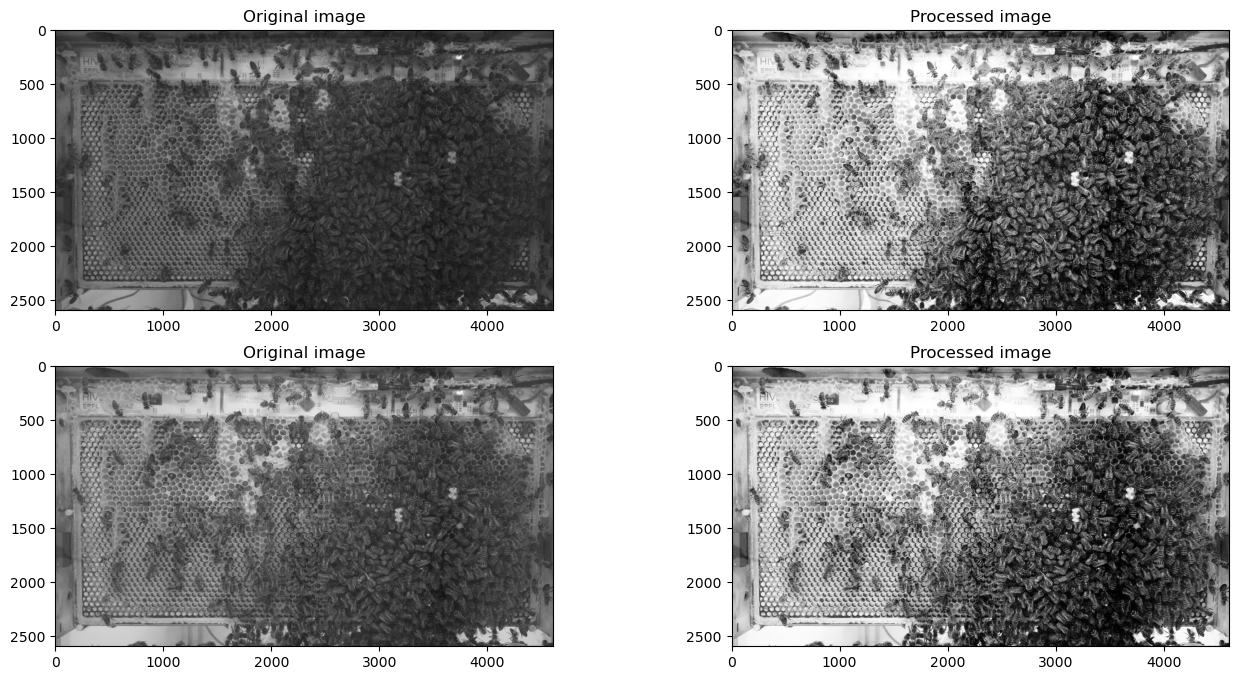

True

In [13]:
from preproc import *
import glob
import matplotlib.pyplot as plt

root = '/Users/cyrilmonette/Desktop/EPFL 2018-2026/PhD - Mobots/data/24.09-24.10_observation_OH/Images/h1r1_1minute/'
# List all files and take the 100th one
flist = glob.glob(root + "*.jpg")
flist = sorted(flist)

img = cv.imread(flist[60000], cv.IMREAD_GRAYSCALE)
last_img = cv.imread(flist[-1], cv.IMREAD_GRAYSCALE)
processed_img = beautify_frame(img)
processed_last_img = beautify_frame(last_img)

# Show original and processed image side by side with matplotlib
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.subplot(2, 2, 2)
plt.imshow(processed_img, cmap='gray')
plt.title('Processed image')
plt.subplot(2, 2, 3)
plt.imshow(last_img, cmap='gray')
plt.title('Original image')
plt.subplot(2, 2, 4)
plt.imshow(processed_last_img, cmap='gray')
plt.title('Processed image')
plt.show()

# Save processed image as output.jpg in current directory and input image as input.jpg
cv.imwrite('output.jpg', processed_img)
cv.imwrite('input.jpg', img)

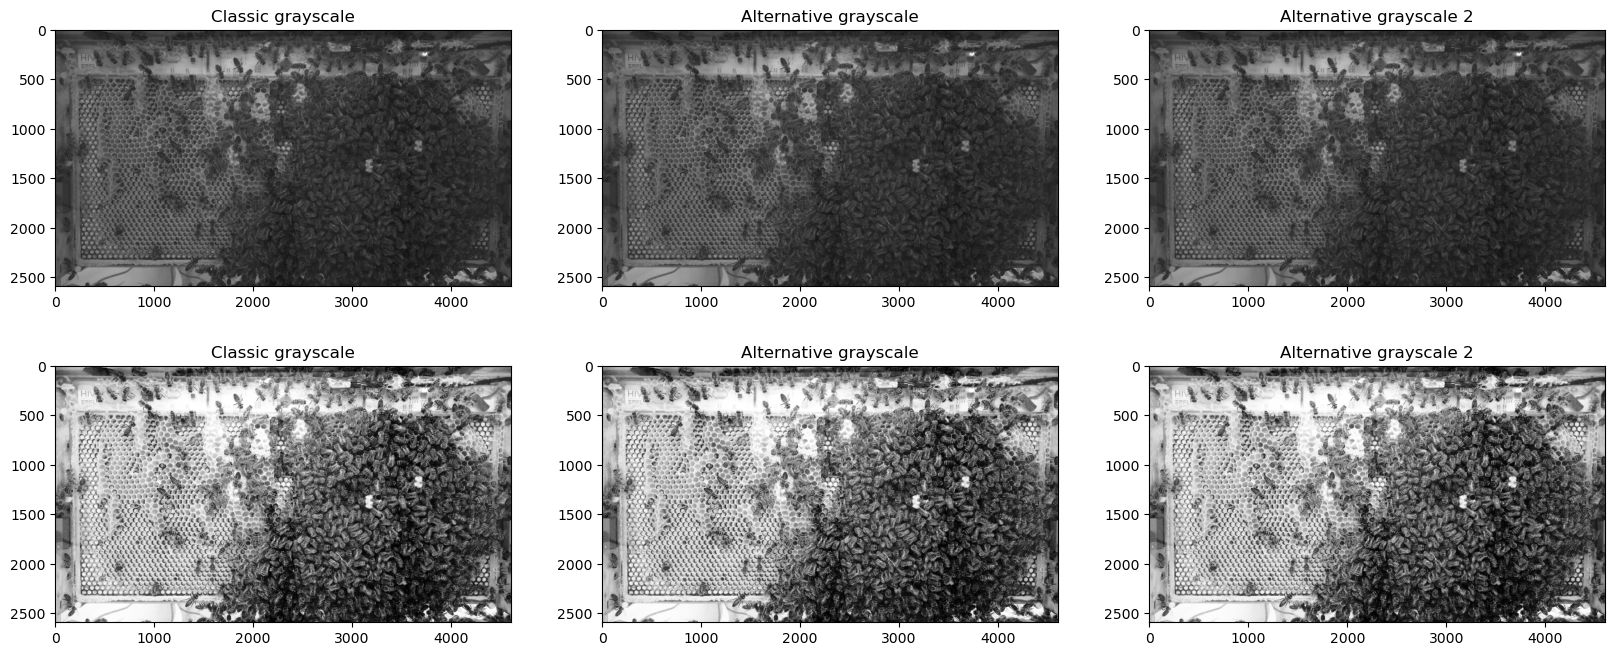

True

In [12]:
# Here I want to test a different BGR function that could optimise speed ! Conclusion: alternative2 is the exact same as cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def grayscale(bgr):
    result = ((bgr[..., 0] * 0.0721) +
              (bgr[..., 1] * 0.7154) +
              (bgr[..., 2] * 0.2125))
    return result

def grayscale2(bgr):
    result = ((bgr[..., 0] * 0.114) +
              (bgr[..., 1] * 0.587) +
              (bgr[..., 2] * 0.299))
    return result

root = '/Users/cyrilmonette/Desktop/EPFL 2018-2026/PhD - Mobots/data/24.09-24.10_observation_OH/Images/h1r1_1minute/'
# List all files and take the 100th one
flist = glob.glob(root + "*.jpg")
flist = sorted(flist)

img = cv.imread(flist[60000])

gray_classic = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_alternative = grayscale(img)
gray_alternative2 = grayscale2(img)
pp_classic = beautify_frame(gray_classic)
pp_alternative = beautify_frame(gray_alternative)
pp_alternative2 = beautify_frame(gray_alternative2)

# Show the two grayscale images side by side
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
plt.imshow(gray_classic, cmap='gray')
plt.title('Classic grayscale')
plt.subplot(2, 3, 2)
plt.imshow(gray_alternative, cmap='gray')
plt.title('Alternative grayscale')
plt.subplot(2, 3, 3)
plt.imshow(gray_alternative2, cmap='gray')
plt.title('Alternative grayscale 2')
plt.subplot(2, 3, 4)
plt.imshow(pp_classic, cmap='gray')
plt.title('Classic grayscale')
plt.subplot(2, 3, 5)
plt.imshow(pp_alternative, cmap='gray')
plt.title('Alternative grayscale')
plt.subplot(2, 3, 6)
plt.imshow(pp_alternative2, cmap='gray')
plt.title('Alternative grayscale 2')
plt.show()

# Save pp_classic and pp_alternative as output_classic.jpg and output_alternative.jpg
cv.imwrite('output_classic.jpg', pp_classic)
cv.imwrite('output_alternative.jpg', pp_alternative)
cv.imwrite('output_alternative2.jpg', pp_alternative2)

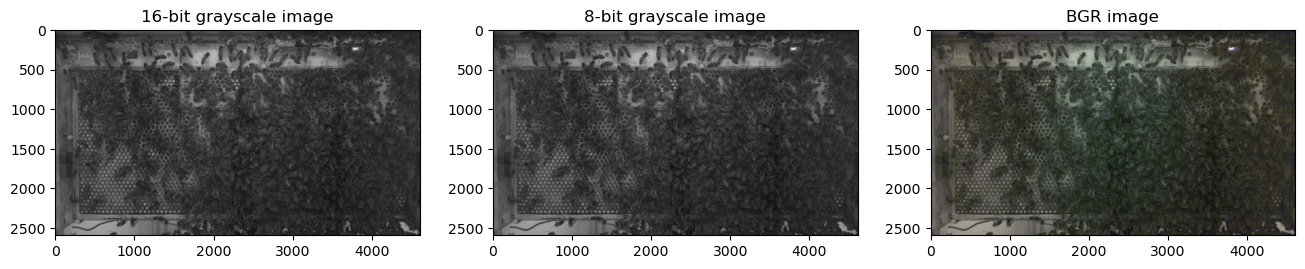

Min value: 0
Max value: 255
Min value: 0
Max value: 255
Min value: 0
Max value: 255
Image format: uint8
Image shape: (2592, 4608, 3)
Image format: uint8


In [12]:
# For the same initial image, show the image in 16-bit grayscale and in BGR
img_bgr = cv.imread(flist[1000], cv.IMREAD_COLOR)
gray_16bit = cv.imread(flist[1000], cv.IMREAD_ANYDEPTH)
gray_8bit = cv.imread(flist[1000], cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(gray_16bit, cmap='gray')
plt.title('16-bit grayscale image')
plt.subplot(1, 3, 2)
plt.imshow(gray_8bit, cmap='gray')
plt.title('8-bit grayscale image')
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.title('BGR image')
plt.show()

# Test to see the min and max values in gray_16bit
print('Min value:', np.min(gray_16bit))
print('Max value:', np.max(gray_16bit))

# Test to see the min and max values in gray_8bit
print('Min value:', np.min(gray_8bit))
print('Max value:', np.max(gray_8bit))

# Test to see the min and max values in img_bgr
print('Min value:', np.min(img_bgr))
print('Max value:', np.max(img_bgr))
# What format does img_bgr have?
print('Image format:', img_bgr.dtype)
print('Image shape:', img_bgr.shape)

# Convert the rgb image to 16-bit grayscale
gray_16bit_bgr = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
print('Image format:', gray_16bit_bgr.dtype)
